Apply data cleaning techniques by cleaning the given dataset by handling missing values, duplicates, inconsistencies, outliers, and standardizing formats for better data quality

In [ ]:
# Data Cleaning Techniques
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Upload dataset
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your file

Saving exp2_CountryAgeSalary.csv to exp2_CountryAgeSalary.csv


In [ ]:
# Read the dataset (assuming it's a CSV file)
# If your file has a different format, adjust the reading method accordingly
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [ ]:
# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes


In [ ]:
# Check basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
None


In [ ]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


In [ ]:
# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())


Number of Duplicates: 0


In [ ]:
# Data Cleaning Process

# 1. Handling Missing Values
# For numerical columns (Age and Salary), impute with mean
num_imputer = SimpleImputer(strategy='mean')
df[['Age', 'Salary']] = num_imputer.fit_transform(df[['Age', 'Salary']])

print("\nAfter Imputing Missing Values:")
print(df.head())


After Imputing Missing Values:
   Country   Age        Salary Purchased
0   France  44.0  72000.000000        No
1    Spain  27.0  48000.000000       Yes
2  Germany  30.0  54000.000000        No
3    Spain  38.0  61000.000000        No
4  Germany  40.0  63777.777778       Yes


In [ ]:
# 2. Encoding Categorical Variables
# Label Encoding for Country
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])
print("\nLabel Encoding for Country:")
for i, country in enumerate(le.classes_):
    print(f"{country}: {i}")

# One-Hot Encoding for Country
pd.get_dummies(df['Country'], prefix='Country').head()
df = pd.concat([df, pd.get_dummies(df['Country'], prefix='Country')], axis=1)

# Label Encoding for Purchased
df['Purchased_encoded'] = le.fit_transform(df['Purchased'])
print("\nLabel Encoding for Purchased:")
for i, purchased in enumerate(le.classes_):
    print(f"{purchased}: {i}")


Label Encoding for Country:
France: 0
Germany: 1
Spain: 2

Label Encoding for Purchased:
No: 0
Yes: 1


In [ ]:
# 3. Detecting Outliers using IQR Method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detecting outliers in Age
age_outliers = detect_outliers_iqr(df, 'Age')
print("\nOutliers in Age:")
print(age_outliers)

# Detecting outliers in Salary
salary_outliers = detect_outliers_iqr(df, 'Salary')
print("\nOutliers in Salary:")
print(salary_outliers)


Outliers in Age:
Empty DataFrame
Columns: [Country, Age, Salary, Purchased, Country_encoded, Country_France, Country_Germany, Country_Spain, Purchased_encoded]
Index: []

Outliers in Salary:
Empty DataFrame
Columns: [Country, Age, Salary, Purchased, Country_encoded, Country_France, Country_Germany, Country_Spain, Purchased_encoded]
Index: []


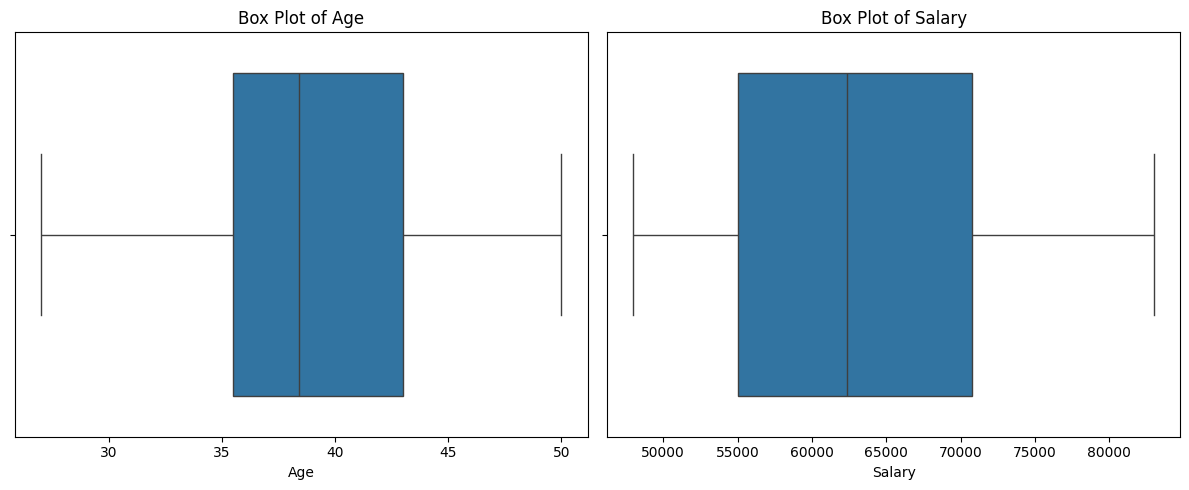

In [ ]:
# 4. Visualizing Data after Cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Salary'])
plt.title('Box Plot of Salary')

plt.tight_layout()
plt.show()

In [ ]:
# 5. Summary Statistics
print("\nSummary Statistics After Cleaning:")
print(df.describe())


Summary Statistics After Cleaning:
             Age        Salary  Country_encoded  Purchased_encoded
count  10.000000     10.000000        10.000000          10.000000
mean   38.777778  63777.777778         0.900000           0.500000
std     7.253777  11564.099406         0.875595           0.527046
min    27.000000  48000.000000         0.000000           0.000000
25%    35.500000  55000.000000         0.000000           0.000000
50%    38.388889  62388.888889         1.000000           0.500000
75%    43.000000  70750.000000         1.750000           1.000000
max    50.000000  83000.000000         2.000000           1.000000


In [ ]:
# 6. Final Clean Dataset
print("\nFinal Clean Dataset:")
print(df.head())


Final Clean Dataset:
   Country   Age        Salary Purchased  Country_encoded  Country_France  \
0   France  44.0  72000.000000        No                0            True   
1    Spain  27.0  48000.000000       Yes                2           False   
2  Germany  30.0  54000.000000        No                1           False   
3    Spain  38.0  61000.000000        No                2           False   
4  Germany  40.0  63777.777778       Yes                1           False   

   Country_Germany  Country_Spain  Purchased_encoded  
0            False          False                  0  
1            False           True                  1  
2             True          False                  0  
3            False           True                  0  
4             True          False                  1  


In [ ]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'
